#Reading data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
# from neural_net import NeuralNet
# from collections import Counter

PATH_TRAIN_IMAGES = "data/train-images-idx3-ubyte"
PATH_TRAIN_LABELS = "data/train-labels-idx1-ubyte"

PATH_TEST_IMAGES = "data/t10k-images-idx3-ubyte"
PATH_TEST_LABELS = "data/t10k-labels-idx1-ubyte"

COL_SIZE = 28


def load_datasets(set_name="train"):
    if set_name == "train":
        images, labels = loadlocal_mnist(
            images_path=PATH_TRAIN_IMAGES,
            labels_path=PATH_TRAIN_LABELS)
    else:
        images, labels = loadlocal_mnist(
            images_path=PATH_TEST_IMAGES,
            labels_path=PATH_TEST_LABELS)

    return images, labels

def show_image(array, label=None):
    img = np.reshape(array, (COL_SIZE, COL_SIZE))
    plt.title(f"Label: {label}")
    plt.imshow(img, cmap='gray')
    plt.show()
    
def show_image_with_index(index: int, set_name="train"):
    images, labels = load_datasets(set_name)
    img = images[index]
    lbl = labels[index]
    print(lbl)
    show_image(img, lbl)

def normalize_pixel_values(arr: np.ndarray, max_val=255.0):
    normalized_arr = arr.astype('float32')
    normalized_arr /= max_val
    return normalized_arr


In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

class Layer:
    def __init__(self, number_of_neurons, number_of_inputs, activation_function):
        self.number_of_neurons = number_of_neurons
        self.number_of_inputs = number_of_inputs
        self.activation_function = activation_function
        self.weights = np.random.uniform(-1,1,(number_of_neurons, number_of_inputs))
        self.bias = np.random.uniform(-0.2,0.2,(number_of_neurons, 1))
        self.z = np.zeros(number_of_neurons, 1)
        self.y = np.zeros(number_of_neurons, 1)

    def activation(self, inputs):
        self.z = np.dot(self.weights, inputs) + self.bias
        self.y = self.activation_function(self.z)

class Network:
    def __init__(self, list_of_numbers_of_neurons, learning_rate, activation):
        self.number_of_neurons = list_of_numbers_of_neurons
        self.learning_rate = learning_rate
        self.layers = []
        for index in range(1, len(list_of_numbers_of_neurons)):
            layer = Layer(list_of_numbers_of_neurons[index], list_of_numbers_of_neurons[index - 1],)
            self.layers.append(layer)

    def feed_forward(self, inputs):
        last_out = inputs.copy()
        for index in range(len(self.layers)):
            last_out = self.layers[index].activation(last_out)
        return last_out

In [5]:
images, labels = load_datasets()

3


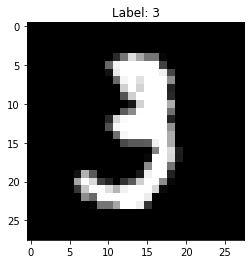

In [8]:
show_image_with_index(10)

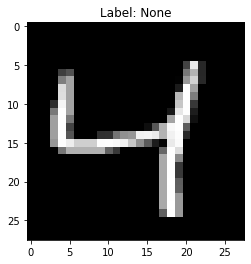

In [7]:
show_image(images[2])

In [9]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
